## Buildings de Seattle - Analyse exploratoire

#### Mission

La mission est de prédire les émissions de CO2 et la consommation totale d’énergie de bâtiments non destinés à l’habitation pour la ville de Seattle. 
On cherche également à évaluer l’intérêt de l’"ENERGY STAR Score" pour la prédiction d’émissions.


#### [Importation des données](#importation-donnees)

#### [Détection des variables cibles et de variables pertinentes du dataset](#cibles-pertinentes)
 - [Variables cibles](#variables-cibles)
 - [Variables pertinentes](#variables-pertinentes)

#### [Suppression de lignes et de colonnes](#suppression-lignes-colonnes)
 - [Suppression des colonnes avec de nombreuses valeurs manquantes](#suppression-des-colonnes-avec-de-nombreuses-valeurs-manquantes)
 - [Suppression des lignes qui ne contiennent pas les valeurs cible](#suppression-des-lignes-qui-ne-contiennent-pas-les-valeurs-cible)
 - [Suppression des lignes mal renseignées (suivant les modalités de ComplianceStatus et DefaultData)](#compliance)
 - [Recherche de doublons](#recherche-de-doublons)
 - [Supression de lignes à valeur négatives](#neg)
 - [Valeur aberrante de TotalGHGEmissions](#au-moins-une-valeur-aberrante-totalghgemissions0)


#### [Analyse de l'âge des bâtiments](#age-batiments)
 - [Feature engineering: création de la colonne BuildingAge](#buildingage)
 - [Distribution des bâtiments par tranche d'âge](#distribution-buildingage)
 - [Diagramme de l'émission de CO2 en fonction de l'âge des bâtiments](#co2-age)
 - [Diagramme de la consommation d'énergie en fonction de l'âge des bâtiments](#energie-age)

#### [Analyse des features représentant les types des bâtiments](#types-batiments)
 - [LargestPropertyUseType, PrimaryPropertyType, BuildingType](#largestpropertyusetype-primarypropertytype-buildingtype)
 - [Suppression des bâtiments non résidentiels](#suppression-multifamily)
 - [Diagramme circulaire de PrimaryPropertyType](#diagramme-circulaire-de-primarypropertytype)
 - [Diagramme circulaire de BuildingType](#diagramme-circulaire-de-buildingtype)
 - [Émissions de CO2 et consommation d'énergie en fonction de BuildingType](#cibles-buildingtype)
 - [Émissions de CO2 et consommation d'énergie en fonction de PrimaryPropertyType](#cibles-primarypropertytype)

#### [Corrélations linéaires entre les valeurs numériques](#correlations-lineaires)
 - [Heatmap pour détecter les features corellées](#heatmap)
 - [Suppression de features en GFA et de features de types associées](#suppression-gfa)
 - [Feature engineering: colonnes de pourcentages immeuble/parking](#feature-engineering-colonnes-de-pourcentages-immeubleparking)
 - [Suppression de la colonne GFABuildingPercent](#suppression-de-la-colonne-gfabuildingpercent)
 - [Calcul du VIF](#calcul-du-vif)

#### [Liens entre la surface totale des immeubes et les variables cibles](#surface-cibles)
 - [Lien entre la surface totale des bâtiments et la consommation d'énergie](#surface-energie)
 - [Lien entre la surface totale des bâtiments et les émissions de CO2](#surface-co2)
 - [Régression linéaire PropertyGFATotal et TotalGHGEmissions](#regression)

#### [Localisation](#localize)
 - [Localisation par quartier (feature Neighborhood)](#localisation-par-quartier-feature-neighborhood)
 - [Boxplots de la consommation d'énergie en fonction des différents quartiers](#quartiers-boxplots)
 - [Feature engineering: distance par rapport au centre ville](#feature-engineering-distance-par-rapport-au-centre-ville)

#### [Exportation des données nettoyées en vue de la modélisation](#export)




 

<a id="importation-donnees"></a>
### Importation des données

Les données sont récupérées sur le site de data.seattle.gov.

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import scipy.stats as st

df = pd.read_csv("2016_Building_Energy_Benchmarking.csv")

In [2]:
df.shape

(3376, 46)

In [3]:
df.columns

Index(['OSEBuildingID', 'DataYear', 'BuildingType', 'PrimaryPropertyType',
       'PropertyName', 'Address', 'City', 'State', 'ZipCode',
       'TaxParcelIdentificationNumber', 'CouncilDistrictCode', 'Neighborhood',
       'Latitude', 'Longitude', 'YearBuilt', 'NumberofBuildings',
       'NumberofFloors', 'PropertyGFATotal', 'PropertyGFAParking',
       'PropertyGFABuilding(s)', 'ListOfAllPropertyUseTypes',
       'LargestPropertyUseType', 'LargestPropertyUseTypeGFA',
       'SecondLargestPropertyUseType', 'SecondLargestPropertyUseTypeGFA',
       'ThirdLargestPropertyUseType', 'ThirdLargestPropertyUseTypeGFA',
       'YearsENERGYSTARCertified', 'ENERGYSTARScore', 'SiteEUI(kBtu/sf)',
       'SiteEUIWN(kBtu/sf)', 'SourceEUI(kBtu/sf)', 'SourceEUIWN(kBtu/sf)',
       'SiteEnergyUse(kBtu)', 'SiteEnergyUseWN(kBtu)', 'SteamUse(kBtu)',
       'Electricity(kWh)', 'Electricity(kBtu)', 'NaturalGas(therms)',
       'NaturalGas(kBtu)', 'DefaultData', 'Comments', 'ComplianceStatus',
       'Outlier

<a id='cibles-pertinentes'></a>
### Détection des variables cibles et de variables pertinentes du dataset 

#### Variables cibles:  

Pour l'émission de CO2:  
TotalGHGEmissions  
GHGEmissionsIntensity (émissions de CO2 par kWh d'électricité produit, mètre carré d'espace bâti...)
  
Pour l'énergie:    
SiteEnergyUse(kBtu) (consommation d'énergie en kBtu, 10 kBtu environ égal à 2,93 kWh)    
SiteEnergyUseWN(kBtu) (Weather Normalized, avec prise en compte des condtions climatiques)  
SiteEUIWN(kBtu/sf)(en kBtu par unité de surface, kilo British Thermal Unit par pied carré)  
  
**On s'en tiendra aux 2 variables cibles suivantes:  
<span style="color:#2196F3;">TotalGHGEmissions  
SiteEnergyUse(kBtu)**</span>

#### Variables pertinentes: 

PropertyGFATotal (pour la surface)   
BuildingType, PrimaryPropertyType  (les types de bâtiments)  
Latitude, Longitude, Neighborhood (la localisation)

<a id='suppression-lignes-colonnes'></a>
### Suppression de lignes et de colonnes

#### Suppression des colonnes avec de nombreuses valeurs manquantes

<Axes: >

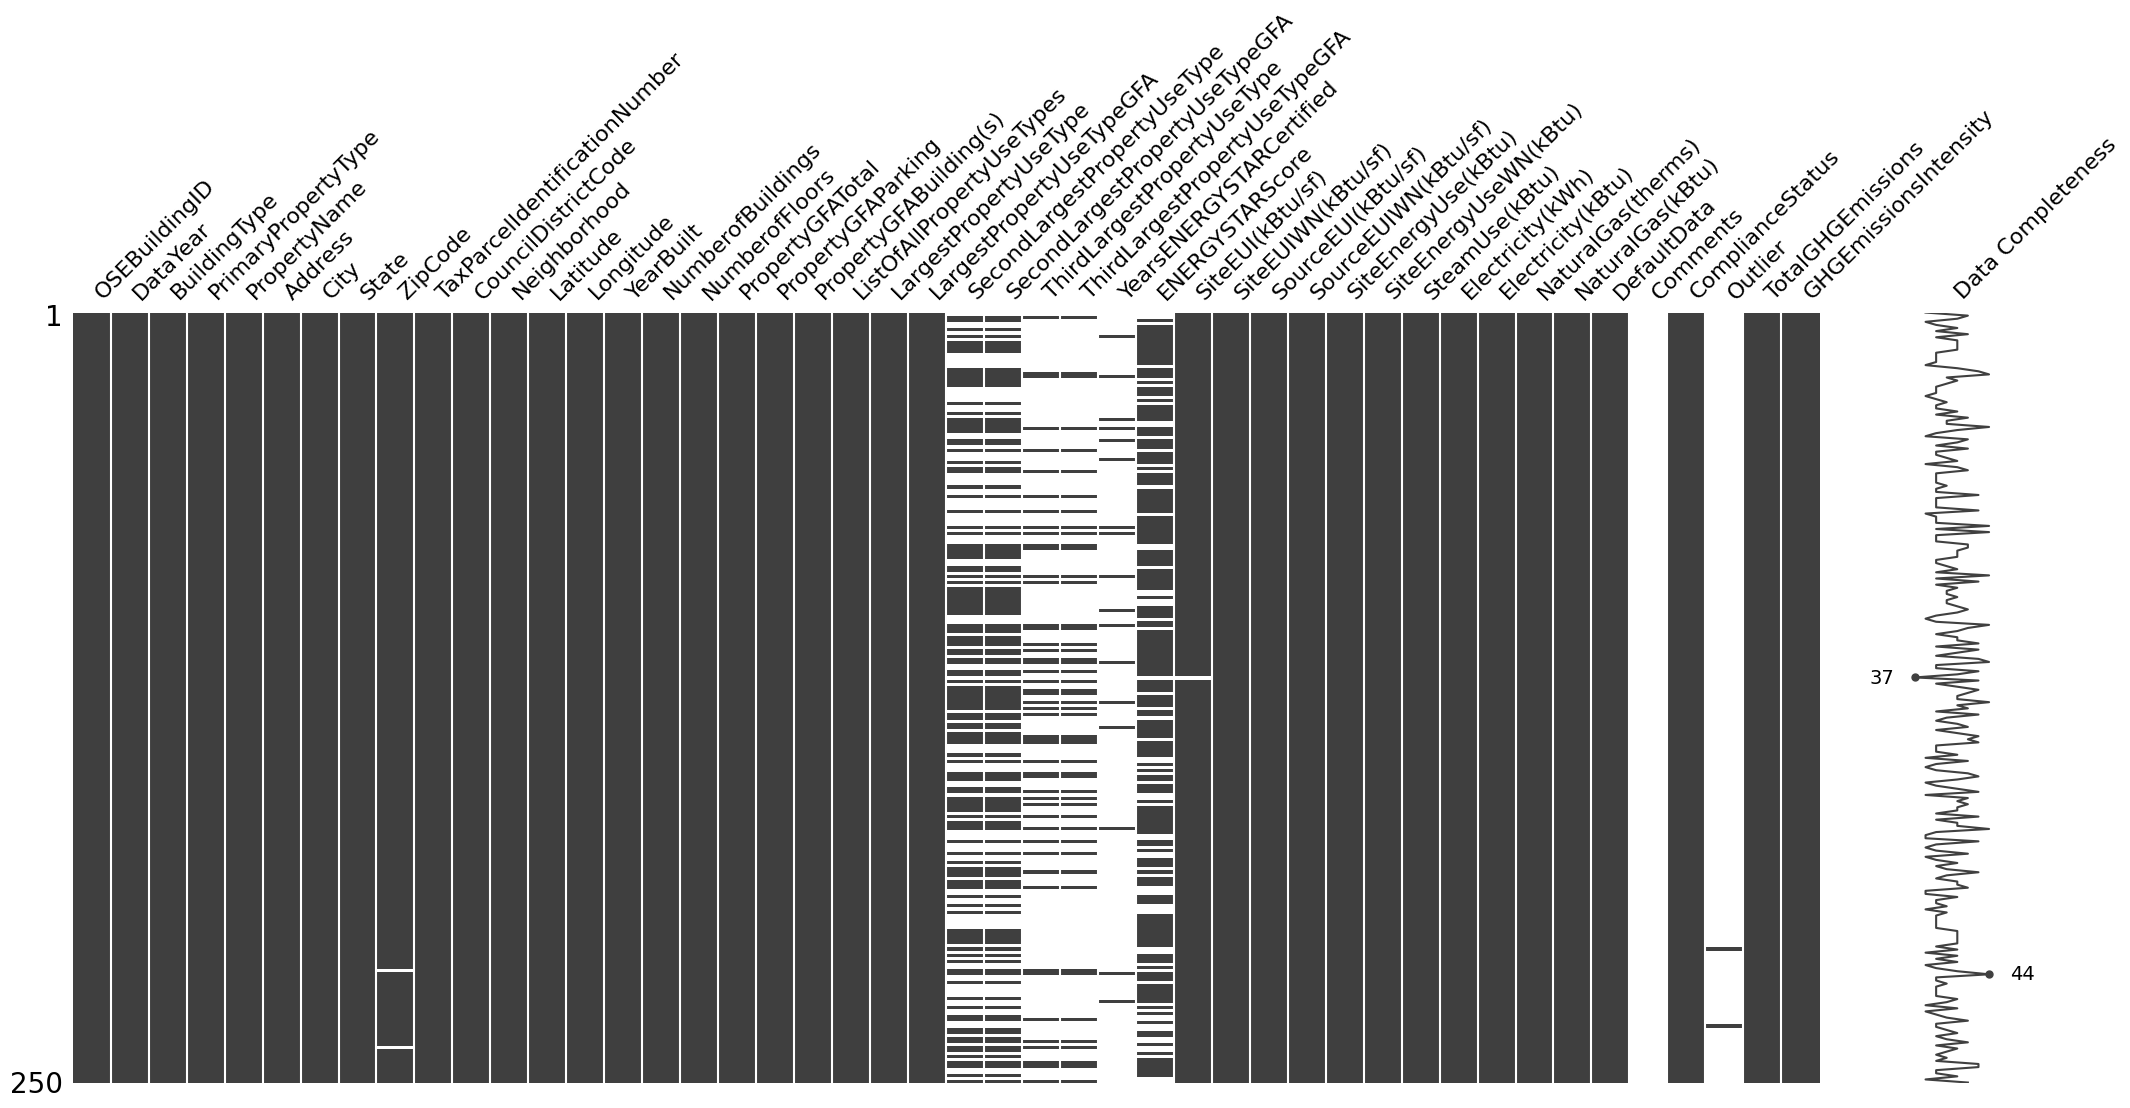

In [4]:
import missingno as msno
%matplotlib inline
msno.matrix(df.sample(250), labels=True)

In [5]:
df.drop(['Comments', 'Outlier'], axis=1, inplace=True)

In [6]:
pd.set_option('display.max_columns', None)
df.sample(8)

,OSEBuildingID,DataYear,BuildingType,PrimaryPropertyType,PropertyName,Address,City,State,ZipCode,TaxParcelIdentificationNumber,CouncilDistrictCode,Neighborhood,Latitude,Longitude,YearBuilt,NumberofBuildings,NumberofFloors,PropertyGFATotal,PropertyGFAParking,PropertyGFABuilding(s),ListOfAllPropertyUseTypes,LargestPropertyUseType,LargestPropertyUseTypeGFA,SecondLargestPropertyUseType,SecondLargestPropertyUseTypeGFA,ThirdLargestPropertyUseType,ThirdLargestPropertyUseTypeGFA,YearsENERGYSTARCertified,ENERGYSTARScore,SiteEUI(kBtu/sf),SiteEUIWN(kBtu/sf),SourceEUI(kBtu/sf),SourceEUIWN(kBtu/sf),SiteEnergyUse(kBtu),SiteEnergyUseWN(kBtu),SteamUse(kBtu),Electricity(kWh),Electricity(kBtu),NaturalGas(therms),NaturalGas(kBtu),DefaultData,ComplianceStatus,TotalGHGEmissions,GHGEmissionsIntensity
3367,50212,2016,Nonresidential COS,Other,Conservatory Campus,1400 E Galer St,Seattle,WA,NaN,2925049087,3,EAST,47.63228,-122.31574,1912,1.0,1,23445,0,23445,Other - Recreation,Other - Recreation,23445.0,NaN,NaN,NaN,NaN,NaN,NaN,254.899994,286.500000,380.100006,413.200012,5.976246e+06,6716330.000,0.0,369539.81250,1260869.84,47153.757810,4715375.781,False,Compliant,259.22,11.06
1854,23595,2016,Multifamily LR (1-4),Low-Rise Multifamily,KINNEAR (ID23595),905 OLYMPIC WAY W,Seattle,WA,98119.0,3879901970,7,MAGNOLIA / QUEEN ANNE,47.62862,-122.36827,1907,1.0,4,34498,0,34498,Multifamily Housing,Multifamily Housing,34498.0,NaN,NaN,NaN,NaN,NaN,100.0,26.400000,28.900000,37.200001,39.900002,9.106392e+05,997765.375,0.0,45935.30078,156731.00,7539.080566,753908.000,False,Compliant,41.13,1.19
2695,26657,2016,NonResidential,Worship Facility,University Lutheran Church,1604 NE 50th St,Seattle,WA,98105.0,8823901075,4,NORTHEAST,47.66517,-122.31037,1927,1.0,3,41013,0,41013,"Office, Worship Facility",Worship Facility,32098.0,Office,2310.0,NaN,NaN,NaN,NaN,31.400000,34.599998,59.299999,62.700001,1.080821e+06,1191549.250,0.0,126878.60160,432910.00,6479.110352,647911.000,False,Compliant,37.43,0.91
1020,20523,2016,NonResidential,Small- and Mid-Sized Office,ABM/ Johnson Barrow,2001 22nd ave. S.,Seattle,WA,98144.0,1498302245,2,GREATER DUWAMISH,47.58528,-122.30500,1961,1.0,1,29740,0,29740,"Non-Refrigerated Warehouse, Office",Office,17804.0,Non-Refrigerated Warehouse,12208.0,NaN,NaN,NaN,57.0,48.900002,51.099998,139.000000,141.300003,1.467060e+06,1533262.000,0.0,369049.00000,1259195.00,2078.650146,207865.000,False,Compliant,19.82,0.67
3327,50049,2016,Multifamily LR (1-4),Low-Rise Multifamily,PACIFIC CENTER CONDOMINIUM (ID50049),321 10TH AVE S,Seattle,WA,98104.0,6599950000,2,DOWNTOWN,47.59980,-122.32034,2000,1.0,4,44650,0,44650,Multifamily Housing,Multifamily Housing,44650.0,NaN,NaN,NaN,NaN,NaN,58.0,28.000000,29.200001,87.800003,91.800003,1.248599e+06,1305528.375,0.0,365943.40630,1248599.00,0.000000,0.000,False,Compliant,8.70,0.19
183,291,2016,SPS-District K-12,K-12 School,Thurgood Marshall Elementary,2401 S. Irving St.,Seattle,WA,98144.0,9344400300,3,CENTRAL,47.59096,-122.29985,1991,1.0,2,64414,0,64414,K-12 School,K-12 School,65310.0,NaN,NaN,NaN,NaN,NaN,67.0,35.099998,37.599998,110.300003,117.900002,2.295176e+06,2453255.500,0.0,672677.68750,2295176.00,0.000000,0.000,True,Error - Correct Default Data,16.00,0.25
2559,26098,2016,NonResidential,K-12 School,Christ the King Middle School,421 N. 117th,Seattle,WA,98133.0,6140100225,5,NORTHWEST,47.71387,-122.35350,1938,1.0,2,23222,0,23222,K-12 School,K-12 School,15006.0,NaN,NaN,NaN,NaN,NaN,62.0,81.300003,88.800003,114.699997,123.699997,1.219863e+06,1331981.250,0.0,61771.10156,210763.00,10091.000000,1009100.000,False,Compliant,55.06,2.37
2540,26017,2016,NonResidential,Residence Hall,Aloha Inn,1911 Aurora Ave N,Seattle,WA,98109.0,9301301410,7,MAGNOLIA / QUEEN ANNE,47.63651,-122.34418,1981,1.0,4,23513,2211,21302,"Office, Parking, Residence Hall/Dormitory, Res...",Residence Hall/Dormitory,15200.0,Office,2600.0,Social/Meeting Hall,1800.0,NaN,NaN,81.699997,83.500000,176.500000,182.000000,1.740568e+06,1778251.875,0.0,270940.59380,924449.00,8161.189941,816

In [7]:
pd.reset_option('display.max_columns')

#### Suppression des lignes qui ne contiennent pas les valeurs cible

In [8]:
print("Nombre de valeurs manquantes dans TotalGHGEmissions :", df['TotalGHGEmissions'].isna().sum())
print("Nombre de valeurs manquantes dans SiteEnergyUse(kBtu) :", df['SiteEnergyUse(kBtu)'].isna().sum())

Nombre de valeurs manquantes dans TotalGHGEmissions : 9
Nombre de valeurs manquantes dans SiteEnergyUse(kBtu) : 5


In [9]:
df = df[~((df['SiteEnergyUse(kBtu)'].isnull()) | (df['TotalGHGEmissions'].isnull()))]
df.shape

(3367, 44)

<a id='compliance'></a>
#### Suppression des lignes mal renseignées (suivant les modalités de ComplianceStatus et DefaultData)

In [10]:
df['ComplianceStatus'].value_counts()


ComplianceStatus
Compliant                       3207
Error - Correct Default Data     113
Non-Compliant                     32
Missing Data                      15
Name: count, dtype: int64

In [11]:
df['DefaultData'].value_counts()

DefaultData
False    3254
True      113
Name: count, dtype: int64

In [12]:
df[(df['ComplianceStatus'] == 'Error - Correct Default Data') & (df['DefaultData'] == True)].shape[0]


113

Ce sont les même lignes qui ont ComplianceStatus = Error - Correct Default Data et DefaultData = True

In [13]:
df = df[~df['ComplianceStatus'].isin(['Non-Compliant', 'Error - Correct Default Data', 'Missing Data'])]
df = df.reset_index(drop=True)
df.shape


(3207, 44)

On supprime ensuite les colonnes DefaultData et ComplianceStatus.

In [14]:
df.drop(['ComplianceStatus', 'DefaultData'], axis=1, inplace=True)

#### Recherche de doublons

In [15]:
df_subset = df[["OSEBuildingID", "Address"]]
duplicates = df_subset.duplicated(keep=False)
duplicate_rows = df_subset[duplicates]
duplicate_rows

,OSEBuildingID,Address


<a id='neg'></a>
#### Suppression de lignes à valeurs négatives

In [16]:
numeric_cols = df.select_dtypes('number').columns
df[numeric_cols].columns[df[numeric_cols].min() < 0].tolist()

['Longitude',
 'SourceEUIWN(kBtu/sf)',
 'Electricity(kWh)',
 'Electricity(kBtu)',
 'TotalGHGEmissions',
 'GHGEmissionsIntensity']

In [17]:
num_rows_removed_source_euiwn = len(df[df['SourceEUIWN(kBtu/sf)'] < 0])
df = df[df['SourceEUIWN(kBtu/sf)'] >= 0]
print(f"Nombre de lignes supprimées pour SourceEUIWN(kBtu/sf) négatif : {num_rows_removed_source_euiwn}")

num_rows_removed_ghg_intensity = len(df[(df['GHGEmissionsIntensity'] < 0) | (df['TotalGHGEmissions'] < 0)])
df = df[~((df['GHGEmissionsIntensity'] < 0) | (df['TotalGHGEmissions'] < 0))]

print(f"Nombre de lignes supprimées pour GHGEmissionsIntensity ou TotalGHGEmissions négatif : {num_rows_removed_ghg_intensity}")

num_rows_removed_electricity = len(df[(df['Electricity(kWh)'] < 0) | (df['Electricity(kBtu)'] < 0)])
df = df[~((df['Electricity(kWh)'] < 0) | (df['Electricity(kBtu)'] < 0))]
print(f"Nombre de lignes supprimées pour Electricity(kWh) ou Electricity(kBtu) négatif : {num_rows_removed_electricity}")

df.shape

Nombre de lignes supprimées pour SourceEUIWN(kBtu/sf) négatif : 1
Nombre de lignes supprimées pour GHGEmissionsIntensity ou TotalGHGEmissions négatif : 0
Nombre de lignes supprimées pour Electricity(kWh) ou Electricity(kBtu) négatif : 0


(3206, 42)

#### Au moins une valeur aberrante TotalGHGEmissions=0

In [18]:
df[(df['TotalGHGEmissions']==0)]

,OSEBuildingID,DataYear,BuildingType,PrimaryPropertyType,PropertyName,Address,City,State,ZipCode,TaxParcelIdentificationNumber,...,SourceEUIWN(kBtu/sf),SiteEnergyUse(kBtu),SiteEnergyUseWN(kBtu),SteamUse(kBtu),Electricity(kWh),Electricity(kBtu),NaturalGas(therms),NaturalGas(kBtu),TotalGHGEmissions,GHGEmissionsIntensity
464,700,2016,NonResidential,Supermarket / Grocery Store,IUC- Whole Foods Interbay,2001 15th Avenue West,Seattle,WA,98119.0,7666201460,...,0.0,12525174.0,1.284386e+07,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1240,21524,2016,Multifamily LR (1-4),Low-Rise Multifamily,Minor Tower Apartments,2525 Minor Ave E,Seattle,WA,98102.0,2025049091,...,0.0,880115.5,9.197677e+05,0.0,0.0,0.0,0.0,0.0,0.0,0.0


On élimine la valeur aberrante TotalGHGEmissions=0

In [19]:
df = df[~(df['TotalGHGEmissions']==0)]
df.shape

(3204, 42)

<a id="age-batiments"></a>
### Analyse de l'âge des bâtiments

<a id="buildingage"></a>
#### Feature engineering: création de la colonne BuildingAge

BuildingAge: feature qui représente l'âge du bâtiment au moment du relevé

In [20]:
df["BuildingAge"] = df["DataYear"] - df["YearBuilt"]
df[["YearBuilt", "DataYear", "BuildingAge" ]].sample(10)

,YearBuilt,DataYear,BuildingAge
2931,1960,2016,56
943,1953,2016,63
529,1916,2016,100
2872,1908,2016,108
2384,1992,2016,24
484,1951,2016,65
300,2008,2016,8
2605,1910,2016,106
291,1914,2016,102
2803,1963,2016,53


On n'a plus besoin de la colonne YearBuilt

In [21]:
df.drop('YearBuilt', axis=1, inplace=True)


<a id='distribution-buildingage'></a>
#### Distribution des bâtiments par tranche d'âge

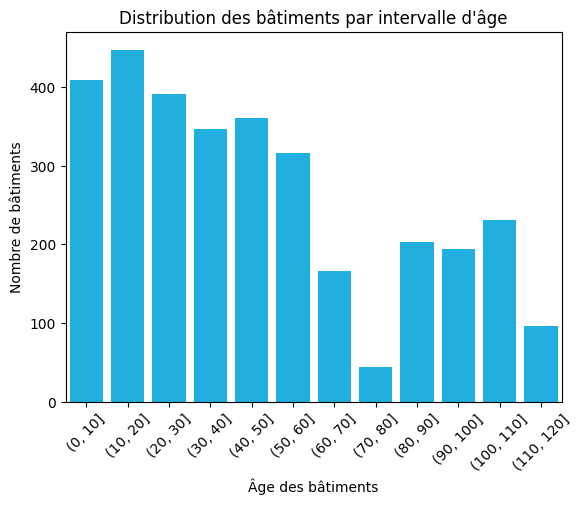

In [22]:
bins = np.arange(0, df['BuildingAge'].max() + 10, 10)

# Discrétisation des valeurs de la colonne "BuildingAge" en utilisant les bins générés
df['BuildingAgeBins'] = pd.cut(df['BuildingAge'], bins=bins)

# Création du diagramme à barres
sns.countplot(data=df, x='BuildingAgeBins', color="#00BFFF")


# Paramètres d'affichage
plt.xticks(rotation=45)
plt.xlabel("Âge des bâtiments")
plt.ylabel("Nombre de bâtiments")
plt.title("Distribution des bâtiments par intervalle d'âge")

plt.show()

<a id='co2-age'></a>
#### Diagramme de l'émission de CO2 en fonction de l'âge des bâtiments

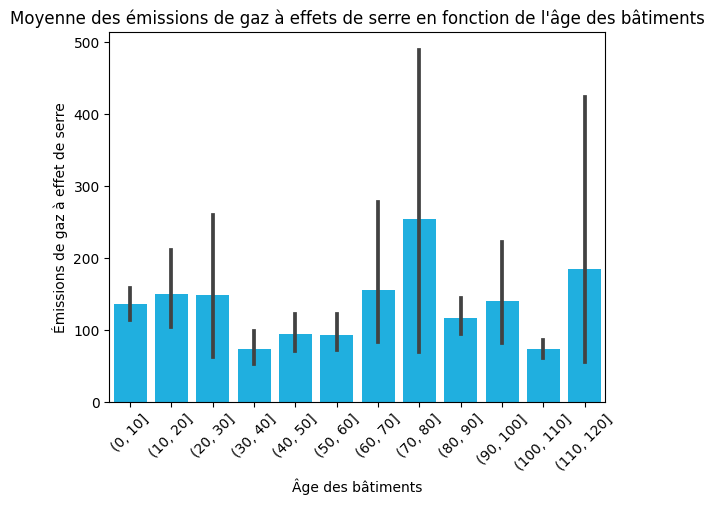

In [23]:
# Génération des bins avec une largeur de 10 jusqu'à la valeur maximale de "BuildingAge"
bins = np.arange(0, df['BuildingAge'].max() + 10, 10)

# Discrétisation des valeurs de la colonne "BuildingAge" en utilisant les bins générés
df['BuildingAgeBins'] = pd.cut(df['BuildingAge'], bins=bins)

# Création du diagramme à barres avec "TotalGHGEmissions" en ordonnée
sns.barplot(data=df, x='BuildingAgeBins', y='TotalGHGEmissions', color="#00BFFF", estimator=np.mean)

# Paramètres d'affichage
plt.xticks(rotation=45)
plt.xlabel("Âge des bâtiments")
plt.ylabel("Émissions de gaz à effet de serre")
plt.title("Moyenne des émissions de gaz à effets de serre en fonction de l'âge des bâtiments")

plt.show()


<a id='energie-age'></a>
#### Diagramme de la consommation d'énergie en fonction de l'âge des bâtiments

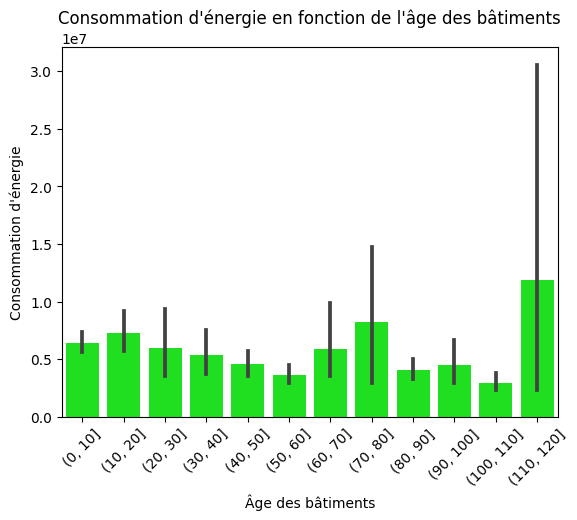

In [24]:

bins = np.arange(0, df['BuildingAge'].max() + 10, 10)

df['BuildingAgeBins'] = pd.cut(df['BuildingAge'], bins=bins)

sns.barplot(data=df, x='BuildingAgeBins', y='SiteEnergyUse(kBtu)', color="#00FF00", estimator=np.mean)

plt.xticks(rotation=45)
plt.xlabel("Âge des bâtiments")
plt.ylabel("Consommation d'énergie")
plt.title("Consommation d'énergie en fonction de l'âge des bâtiments")

plt.show()


In [25]:
df.drop('BuildingAgeBins', axis=1, inplace=True)

Les bâtiments les plus récents semblent être un peu plus consommateurs d'énergie, à part les bâtiments très anciens (110, 120 ans) et un pic de consommation pour les bâtiments entre 70 et 80 ans.  

<a id='types-batiments'></a>
### Analyse des features représentant les type des bâtiments

#### LargestPropertyUseType, PrimaryPropertyType, BuildingType

In [26]:
df['LargestPropertyUseType'].value_counts()

LargestPropertyUseType
Multifamily Housing                                     1625
Office                                                   485
Non-Refrigerated Warehouse                               197
Other                                                     98
Retail Store                                              93
Hotel                                                     76
Worship Facility                                          69
Distribution Center                                       54
K-12 School                                               50
Senior Care Community                                     45
Medical Office                                            41
Supermarket/Grocery Store                                 40
Parking                                                   32
Other - Recreation                                        31
Self-Storage Facility                                     28
College/University                                        25
R

In [27]:
df['PrimaryPropertyType'].value_counts()

PrimaryPropertyType
Low-Rise Multifamily           951
Mid-Rise Multifamily           553
Small- and Mid-Sized Office    286
Other                          250
Warehouse                      185
Large Office                   169
Mixed Use Property             132
High-Rise Multifamily          103
Retail Store                    85
Hotel                           76
Worship Facility                69
Distribution Center             53
K-12 School                     50
Senior Care Community           44
Supermarket / Grocery Store     39
Medical Office                  39
Self-Storage Facility           28
University                      25
Residence Hall                  23
Refrigerated Warehouse          12
Restaurant                      12
Hospital                        10
Laboratory                      10
Name: count, dtype: int64

In [28]:
df["BuildingType"].value_counts()

BuildingType
NonResidential          1430
Multifamily LR (1-4)     980
Multifamily MR (5-9)     570
Multifamily HR (10+)     108
Nonresidential COS        81
Campus                    24
SPS-District K-12         10
Nonresidential WA          1
Name: count, dtype: int64

In [29]:
print('BuildingType: ' + str(df["BuildingType"].nunique()))
print('PrimaryPropertyType: ' + str(df["PrimaryPropertyType"].nunique()))
print('LargestPropertyUseType: ' + str(df["LargestPropertyUseType"].nunique()))

BuildingType: 8
PrimaryPropertyType: 23
LargestPropertyUseType: 55


K 12 sigle américain pour les établissements scolaires

<a id='suppression-multifamily'></a>
#### Suppression des bâtiments non résidentiels

On n'est intéressé que par les bâtiments non résidentiels, en enlève les bâtiments qui contiennent le mot Multifamily

In [30]:
df = df[~df["BuildingType"].str.contains("Multifamily")]
df = df.reset_index(drop=True)

In [31]:
df = df[~df["PrimaryPropertyType"].str.contains("Multifamily")]
df = df.reset_index(drop=True)

In [32]:
df.shape

(1544, 42)

#### Diagramme circulaire de PrimaryPropertyType

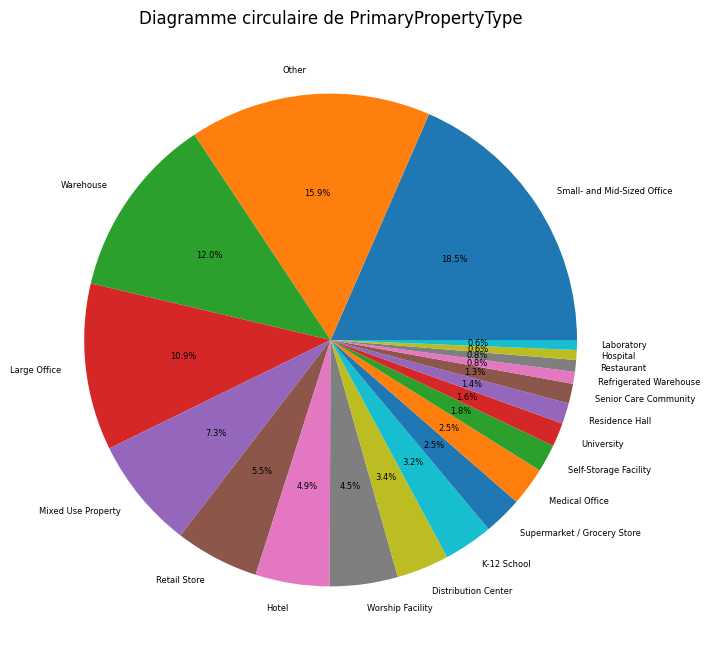

In [33]:
data_cleaned = df['PrimaryPropertyType'].dropna()

property_counts = data_cleaned.value_counts()

labels = property_counts.index
sizes = property_counts.values

plt.figure(figsize=(8, 8))

plt.pie(sizes, labels=labels, autopct='%1.1f%%', textprops={'fontsize': 6})

plt.title('Diagramme circulaire de PrimaryPropertyType')

plt.show()


#### Diagramme circulaire de BuildingType

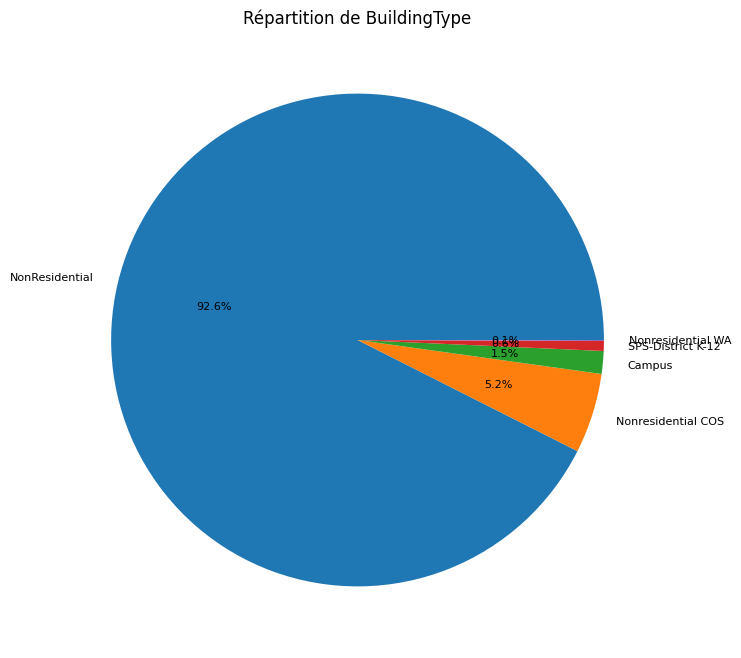

In [34]:
data_cleaned = df['BuildingType'].dropna()

property_counts = data_cleaned.value_counts()

plt.figure(figsize=(8, 8))

labels = property_counts.index
sizes = property_counts.values

plt.pie(sizes, labels=labels, autopct='%1.1f%%', textprops={'fontsize': 8})

plt.title('Répartition de BuildingType')

plt.show()

<a id='cibles-buildingtype'></a>
#### Émissions de CO2 et consommation d'énergie en fonction de BuildingType

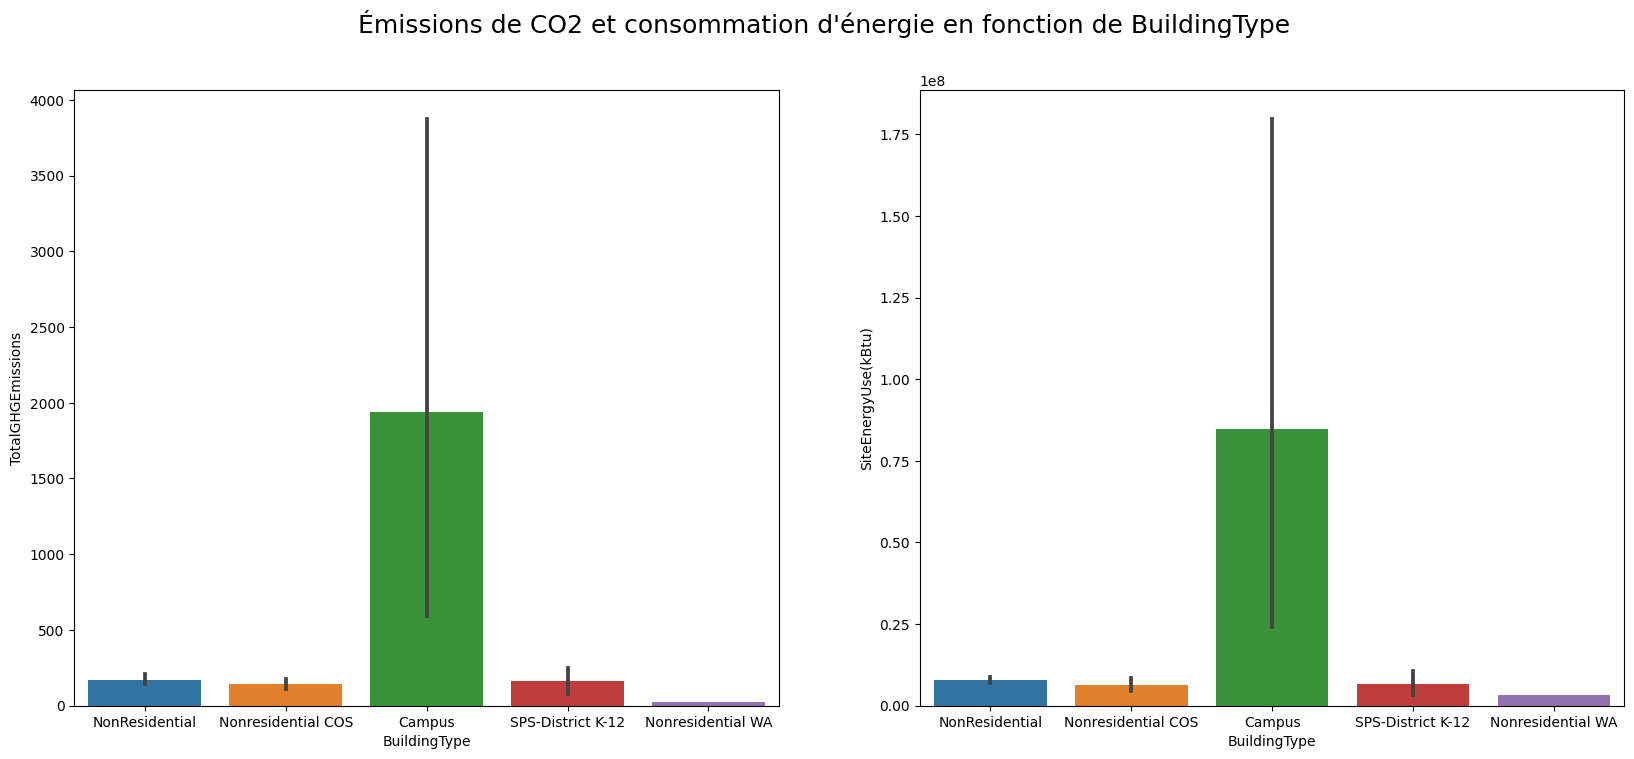

In [35]:
fig, axes = plt.subplots(nrows=1, ncols=2, sharex=False, sharey=False, figsize=(20,8))
sns.barplot(x='BuildingType',y='TotalGHGEmissions',data=df, ax=axes[0])
sns.barplot(x='BuildingType',y='SiteEnergyUse(kBtu)',data=df, ax=axes[1])
plt.suptitle("Émissions de CO2 et consommation d'énergie en fonction de BuildingType", 
            fontsize=18)
plt.show()

<a id='cibles-primarypropertytype'></a>
#### Émissions de CO2 et consommation d'énergie en fonction de PrimaryType

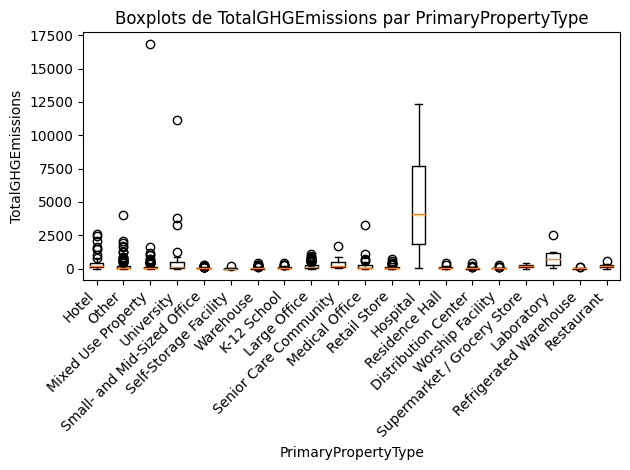

In [36]:
data_cleaned = df[['TotalGHGEmissions', 'PrimaryPropertyType']].dropna()

data_by_property_type = []

for property_type in data_cleaned['PrimaryPropertyType'].unique():
    data_subset = data_cleaned[data_cleaned['PrimaryPropertyType'] == property_type]['TotalGHGEmissions']
    data_by_property_type.append(data_subset)

fig, ax = plt.subplots()

ax.boxplot(data_by_property_type)

ax.set_xticklabels(data_cleaned['PrimaryPropertyType'].unique(), rotation=45, ha='right')

ax.set_xlabel('PrimaryPropertyType')
ax.set_ylabel('TotalGHGEmissions')

ax.set_title('Boxplots de TotalGHGEmissions par PrimaryPropertyType')

plt.tight_layout()
plt.show()


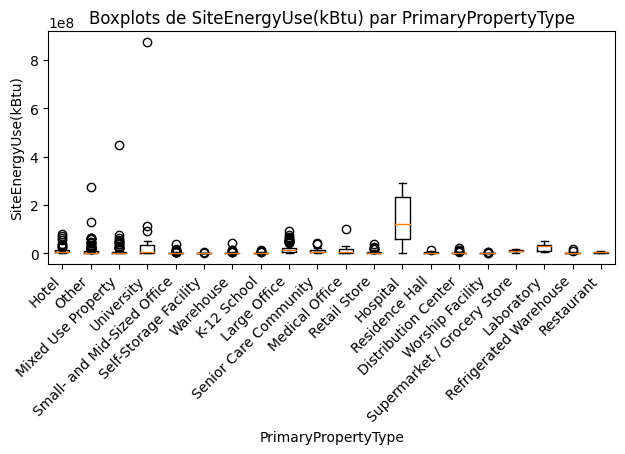

In [37]:
data_cleaned = df[['SiteEnergyUse(kBtu)', 'PrimaryPropertyType']].dropna()

data_by_property_type = []

for property_type in data_cleaned['PrimaryPropertyType'].unique():
    data_subset = data_cleaned[data_cleaned['PrimaryPropertyType'] == property_type]['SiteEnergyUse(kBtu)']
    data_by_property_type.append(data_subset)

fig, ax = plt.subplots()

ax.boxplot(data_by_property_type)

ax.set_xticklabels(data_cleaned['PrimaryPropertyType'].unique(), rotation=45, ha='right')

ax.set_xlabel('PrimaryPropertyType')
ax.set_ylabel('SiteEnergyUse(kBtu)')

ax.set_title('Boxplots de SiteEnergyUse(kBtu) par PrimaryPropertyType')

plt.tight_layout()
plt.show()


Les hopitaux consomment le plus d'énergie et rejettent le plus de CO2.  
Viennent ensuite les laboratoires et les universités.  

<a id='correlations-lineaires'></a>
### Corrélations linéaires entre les valeurs numériques 

On s'abstiendra de prendre des features trop corrélées entre elles dans le X pour les modèles linéaires.

In [38]:
numeric_cols = df.select_dtypes(include='number').columns
df_numeric = df[numeric_cols]

<a id='heatmap'></a>
#### Heatmap pour détecter les features corrélées

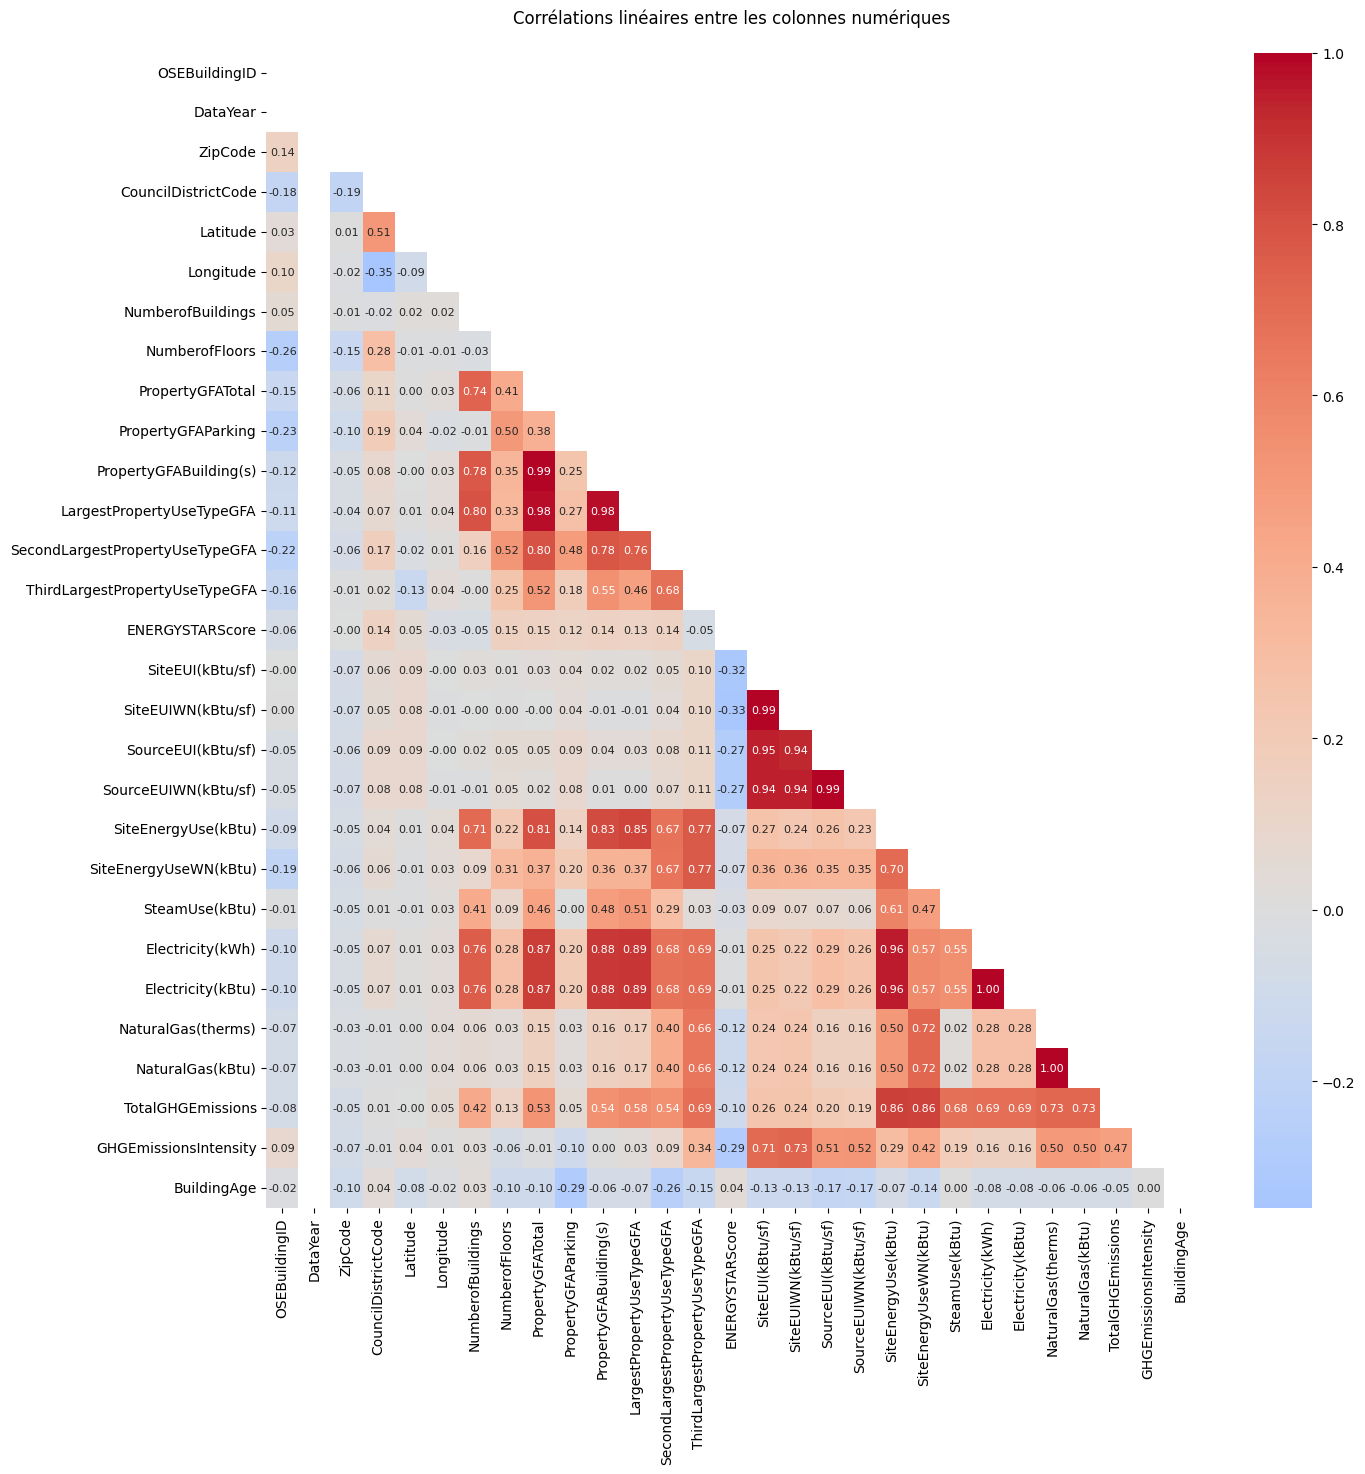

In [39]:
corr = df_numeric.corr()
mask = np.zeros_like(corr)
mask[np.triu_indices_from(mask)] = True
fig, ax = plt.subplots(figsize=(15,15))
ax = sns.heatmap(corr, annot=True, fmt=".2f", annot_kws={'size':8}, 
                 mask=mask, center=0, cmap="coolwarm")
plt.title(f"Corrélations linéaires entre les colonnes numériques\n")
plt.show()

<a id='suppression-gfa'></a>
#### Suppression de features en GFA et de features de types associées

Beaucoup de corrélations linéaires entre les features qui contiennent le mot GFA
(Ground Floor Area, la surface au sol)  
Parmi elles, on supprime les colonnes qui divisent les surfaces en surface primaire, secondaire, tertiaire.

In [40]:
df.drop(['LargestPropertyUseTypeGFA', 
           'SecondLargestPropertyUseTypeGFA',
           'ThirdLargestPropertyUseTypeGFA'],
         axis=1, inplace=True)

In [41]:
print('Valeurs uniques de LargestPropertyUseType: ' + str(df["LargestPropertyUseType"].nunique()))
print('Valeurs uniques de SecondLargestPropertyUseType: ' + str(df["SecondLargestPropertyUseType"].nunique()))
print('Valeurs uniques de ThirdLargestPropertyUseType: ' + str(df["ThirdLargestPropertyUseType"].nunique()))
print('Valeurs uniques de ListOfAllPropertyUseTypes: ' + str(df["ListOfAllPropertyUseTypes"].nunique()))

Valeurs uniques de LargestPropertyUseType: 55
Valeurs uniques de SecondLargestPropertyUseType: 47
Valeurs uniques de ThirdLargestPropertyUseType: 39
Valeurs uniques de ListOfAllPropertyUseTypes: 367


On supprime également les colonnes de type de building associées à ces surfaces, ainsi que la liste trop longue des différents types (368 valeurs différentes)

In [42]:
df.drop(['LargestPropertyUseType', 
           'SecondLargestPropertyUseType',
           'ThirdLargestPropertyUseType', 
           'ListOfAllPropertyUseTypes'],
         axis=1, inplace=True)

#### Feature engineering: colonnes de pourcentages immeuble/parking

In [43]:
df['GFABuildingPercent'] = (round((df['PropertyGFABuilding(s)'].fillna(0)
                                  /df['PropertyGFATotal'].fillna(0)),4))*100
df['GFAParkingPercent'] = (round((df['PropertyGFAParking'].fillna(0)        
                                 /df['PropertyGFATotal'].fillna(0)),4))*100

In [44]:
df.drop(['PropertyGFABuilding(s)', 
           'PropertyGFAParking'],
         axis=1, inplace=True)

#### Suppression de la colonne GFABuildingPercent

On regarde les pourcentages parking/building

In [45]:
df[(df['GFABuildingPercent'].round(2)+df['GFAParkingPercent'].round(2)!=100)].shape[0]

0

La somme building/parking fait bien 100% à chaque fois, on n'a pas besoin des 2 colonnes.  
On n'en garde qu'une seule.

In [46]:
df.drop('GFABuildingPercent', axis=1, inplace=True)

In [47]:
df.shape

(1544, 34)

On regarde à nouveau les corrélations linéaires à présent que l'on a transformé les features en GFA.

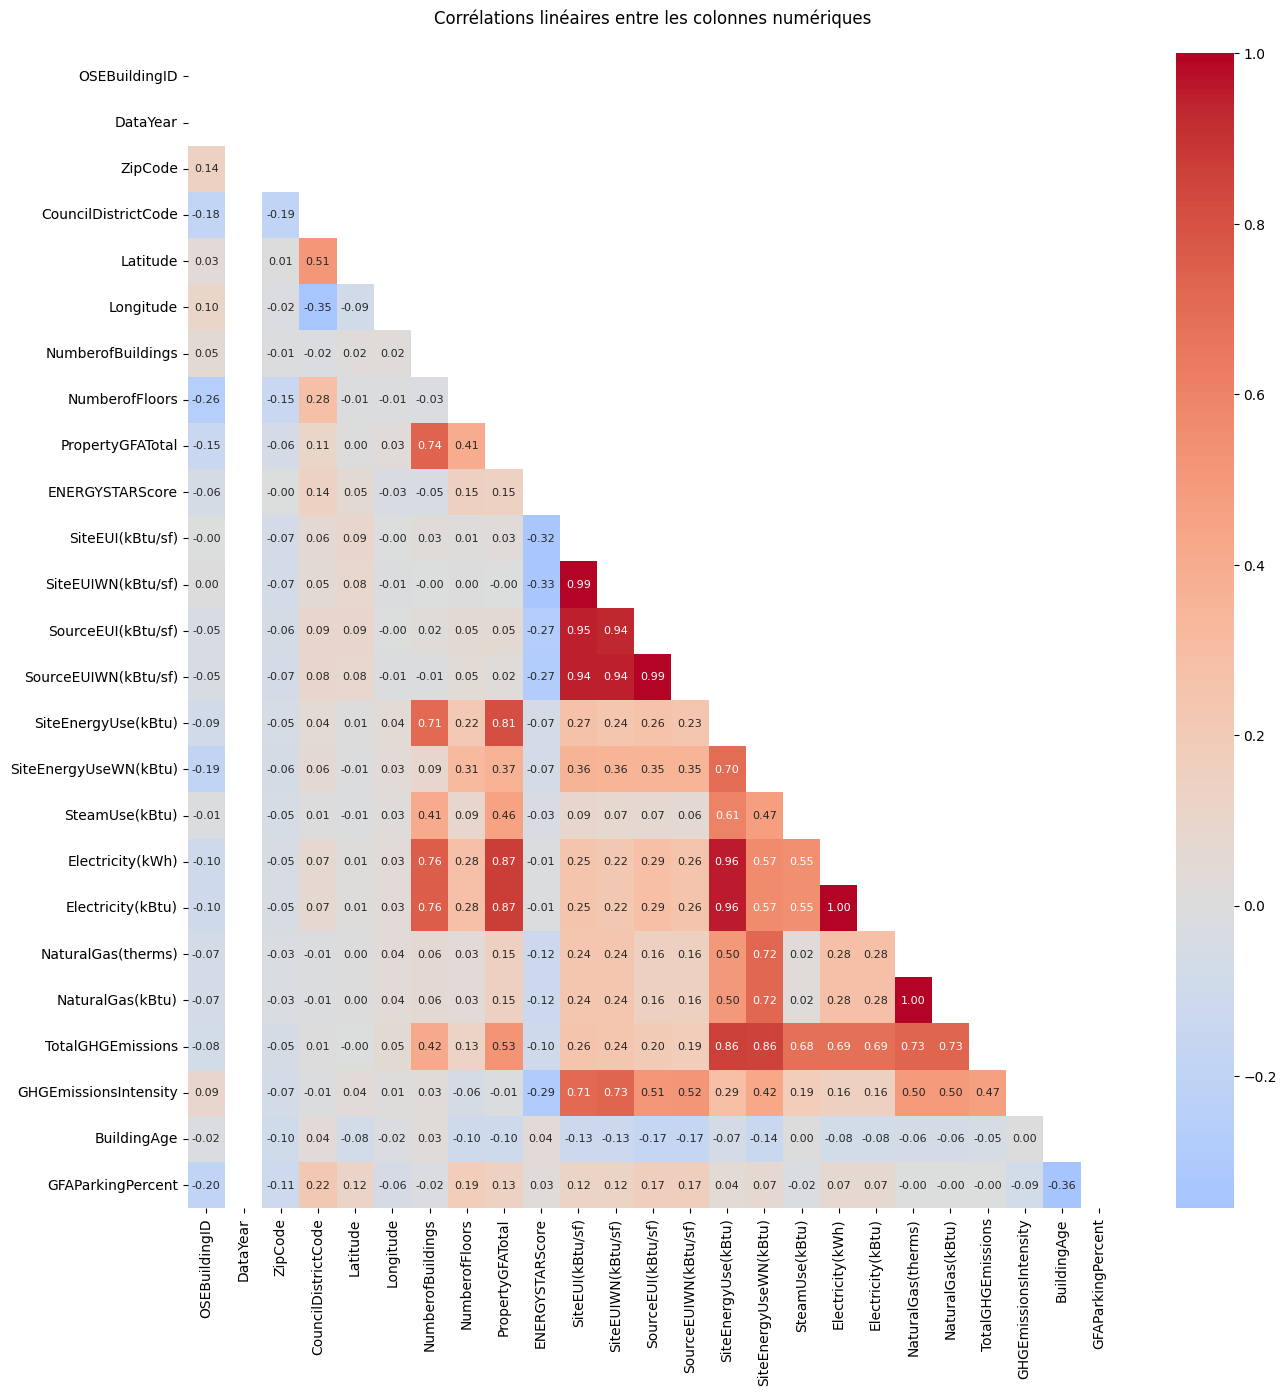

In [48]:
numeric_cols = df.select_dtypes(include='number').columns
df_numeric = df[numeric_cols]
corr = df_numeric.corr()
mask = np.zeros_like(corr)
mask[np.triu_indices_from(mask)] = True
fig, ax = plt.subplots(figsize=(15,15))
ax = sns.heatmap(corr, annot=True, fmt=".2f", annot_kws={'size':8}, 
                 mask=mask, center=0, cmap="coolwarm")
plt.title(f"Corrélations linéaires entre les colonnes numériques\n")
plt.show()

On regarde les paires de variables fortement corrélées. (On fixe le seuil à 0.8.)

In [49]:
threshold = 0.8
corr_pairs = corr.unstack().sort_values(kind="quicksort")
strong_corr = (pd.DataFrame(corr_pairs[(abs(corr_pairs) > threshold)])
               .reset_index().rename(columns={0:'corr_coeff'}))
strong_corr = strong_corr[(strong_corr.index%2 == 0) & (strong_corr['level_0'] != strong_corr['level_1'])]
strong_corr.sort_values('corr_coeff', ascending=False)

,level_0,level_1,corr_coeff
46,Electricity(kWh),Electricity(kBtu),1.000000
26,NaturalGas(therms),NaturalGas(kBtu),1.000000
24,SourceEUI(kBtu/sf),SourceEUIWN(kBtu/sf),0.993695
22,SiteEUIWN(kBtu/sf),SiteEUI(kBtu/sf),0.992810
20,Electricity(kWh),SiteEnergyUse(kBtu),0.956315
18,Electricity(kBtu),SiteEnergyUse(kBtu),0.956315
16,SiteEUI(kBtu/sf),SourceEUI(kBtu/sf),0.948872
14,SourceEUIWN(kBtu/sf),SiteEUI(kBtu/sf),0.944710
12,SiteEUIWN(kBtu/sf),SourceEUIWN(kBtu/sf),0.944150
10,SourceEUI(kBtu/sf),SiteEUIWN(kBtu/sf),0.935341


#### Calcul du VIF

Détermination des features qui ont une forte multicolinéarité avec le calcul du Variance Inflation Factor

In [50]:
from statsmodels.stats.outliers_influence import variance_inflation_factor

strong_corr_features = list(set(list(strong_corr['level_0'].values) + list(strong_corr['level_1'].values)))
X = df[strong_corr_features].replace([np.inf, -np.inf], np.nan)
X = X.dropna()

vif_data = pd.DataFrame()
vif_data["feature"] = X.columns
vif_data["VIF"] = [variance_inflation_factor(X.values, i) 
                   for i in range(len(X.columns))]
vif_data[vif_data['VIF'] > 10]

,feature,VIF
0,NaturalGas(therms),4.503600e+15
1,SourceEUIWN(kBtu/sf),3.775024e+03
2,NaturalGas(kBtu),4.503600e+15
3,TotalGHGEmissions,3.320887e+02
5,SiteEnergyUse(kBtu),2.355062e+03
6,SiteEUIWN(kBtu/sf),3.443708e+03
7,SiteEnergyUseWN(kBtu),4.295096e+01
8,Electricity(kBtu),9.007199e+15
9,SiteEUI(kBtu/sf),3.728379e+03
10,SourceEUI(kBtu/sf),4.058190e+03


In [110]:
cols_to_drop = ['SourceEUIWN(kBtu/sf)', 'NaturalGas(kBtu)', 'SiteEUIWN(kBtu/sf)', 'Electricity(kWh)', 'NaturalGas(therms)', 'SourceEUI(kBtu/sf)', 'Electricity(kBtu)', 'SiteEUI(kBtu/sf)', 'SiteEnergyUseWN(kBtu)']

df.drop(cols_to_drop, axis=1, inplace=True)

Comme on a supprimé les colonnes d'électricité et de gaz naturel, la colonne de vapeur présente moins d'intérêt.  
De même, comme on a supprimé les colonnes de consommation d'énergie par surface, on enlève la colonne d'émissions de gaz à effet de serre par surface.

In [111]:
df.drop(['SteamUse(kBtu)','GHGEmissionsIntensity'], axis=1, inplace=True)


In [51]:
df.shape

(1544, 34)

<a id='surface-cibles'></a>
### Liens entre la surface totale des immeubes et les variables cibles

<a id='surface-energie'></a>
#### Lien entre la surface totale des bâtiments et la consommation d'énergie

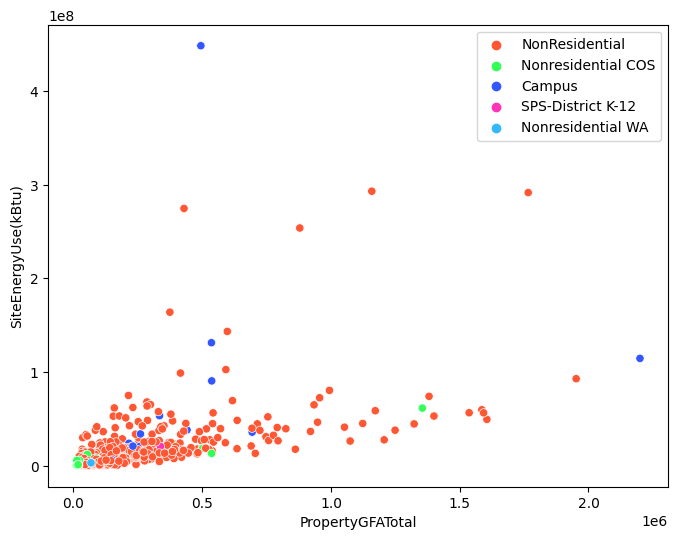

In [74]:
custom_colors = ['#FF5733', '#33FF57', '#3357FF', '#FF33B8', '#33B8FF']

fig = plt.figure(figsize=(8,6))
sns.scatterplot(data = df, x='PropertyGFATotal', y='SiteEnergyUse(kBtu)', hue='BuildingType', palette=custom_colors)
plt.legend(loc='upper right')
plt.show()

In [53]:

df[df['SiteEnergyUse(kBtu)']>8*10**8]

,OSEBuildingID,DataYear,BuildingType,PrimaryPropertyType,PropertyName,Address,City,State,ZipCode,TaxParcelIdentificationNumber,...,SiteEnergyUseWN(kBtu),SteamUse(kBtu),Electricity(kWh),Electricity(kBtu),NaturalGas(therms),NaturalGas(kBtu),TotalGHGEmissions,GHGEmissionsIntensity,BuildingAge,GFAParkingPercent
1506,49967,2016,Campus,University,University of Washington - Seattle Campus,NE 45th St & Brooklyn Ave,Seattle,WA,98105.0,1625049001,...,0.0,84985240.0,192577488.0,657074389.0,0.0,0.0,11140.56,1.2,116,0.0


Une valeur d'énergie très supérieure aux autres, qui semble être atypique.  
On la supprime.  

In [54]:
df = df[~(df['SiteEnergyUse(kBtu)'] > 8 * 10**8)]

<a id='surface-co2'></a>
#### Lien entre la surface totale des immeubles et l'émission de C02

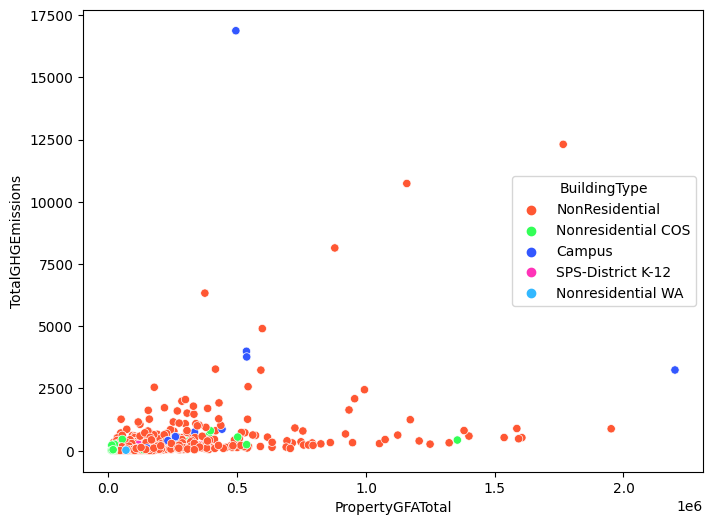

In [70]:
custom_colors = ['#FF5733', '#33FF57', '#3357FF', '#FF33B8', '#33B8FF']

fig = plt.figure(figsize=(8, 6))
sns.scatterplot(data=df, x='PropertyGFATotal', y='TotalGHGEmissions', hue='BuildingType', palette=custom_colors)
plt.show()

<a id='regression'></a>
#### Régression linéaire PropertyGFATotal et TotalGHGEmissions

In [119]:
import statsmodels.api as sm

data = df[['PropertyGFATotal', 'TotalGHGEmissions']].dropna()

X = data['PropertyGFATotal']
Y = data['TotalGHGEmissions']

X = sm.add_constant(X)

model = sm.OLS(Y, X)

results = model.fit()

print(results.summary())

                            OLS Regression Results                            
Dep. Variable:      TotalGHGEmissions   R-squared:                       0.178
Model:                            OLS   Adj. R-squared:                  0.177
Method:                 Least Squares   F-statistic:                     333.0
Date:                Tue, 01 Aug 2023   Prob (F-statistic):           1.63e-67
Time:                        08:27:19   Log-Likelihood:                -12208.
No. Observations:                1543   AIC:                         2.442e+04
Df Residuals:                    1541   BIC:                         2.443e+04
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                       coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------------
const                7.7295     19.487  

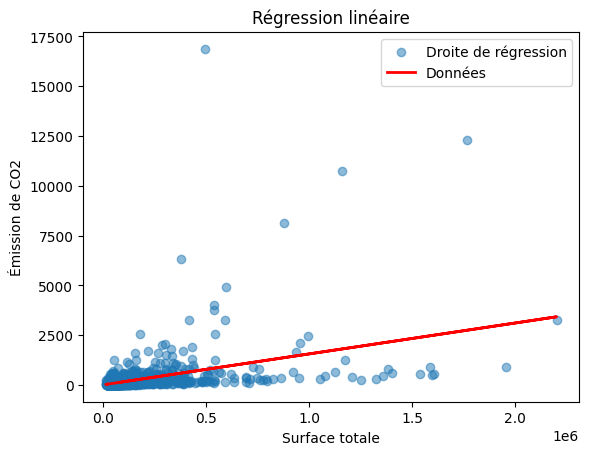

In [120]:
plt.scatter(X['PropertyGFATotal'], Y, alpha=0.5)

plt.plot(X['PropertyGFATotal'], results.fittedvalues, color='red', linewidth=2)

plt.xlabel('Surface totale')
plt.ylabel('Émission de CO2')
plt.title('Régression linéaire')
plt.legend(['Droite de régression', 'Données'])

plt.show()

In [121]:
mask = np.isnan(df["PropertyGFATotal"]) | np.isnan(df["TotalGHGEmissions"])

salt_filtered = df["PropertyGFATotal"][~mask]
additives_filtered = df["TotalGHGEmissions"][~mask]

correlation = st.pearsonr(salt_filtered, additives_filtered)[0]
print(correlation)

0.42154327969393707


<a id='localize'></a>
### Localisation 

#### Localisation par quartier (feature Neighborhood)

In [122]:
df['Neighborhood'].value_counts()

Neighborhood
DOWNTOWN                  350
GREATER DUWAMISH          328
MAGNOLIA / QUEEN ANNE     143
LAKE UNION                142
EAST                      116
NORTHEAST                 116
NORTHWEST                  74
BALLARD                    58
NORTH                      51
CENTRAL                    41
DELRIDGE                   36
SOUTHWEST                  31
SOUTHEAST                  31
North                       8
Ballard                     5
Delridge                    4
Northwest                   4
Central                     4
DELRIDGE NEIGHBORHOODS      1
Name: count, dtype: int64

In [123]:
df['Neighborhood'] = df['Neighborhood'].str.upper()
df['Neighborhood'] = df['Neighborhood'].str.replace('DELRIDGE NEIGHBORHOODS', 'DELRIDGE')
df['Neighborhood'].value_counts()

Neighborhood
DOWNTOWN                 350
GREATER DUWAMISH         328
MAGNOLIA / QUEEN ANNE    143
LAKE UNION               142
NORTHEAST                116
EAST                     116
NORTHWEST                 78
BALLARD                   63
NORTH                     59
CENTRAL                   45
DELRIDGE                  41
SOUTHWEST                 31
SOUTHEAST                 31
Name: count, dtype: int64

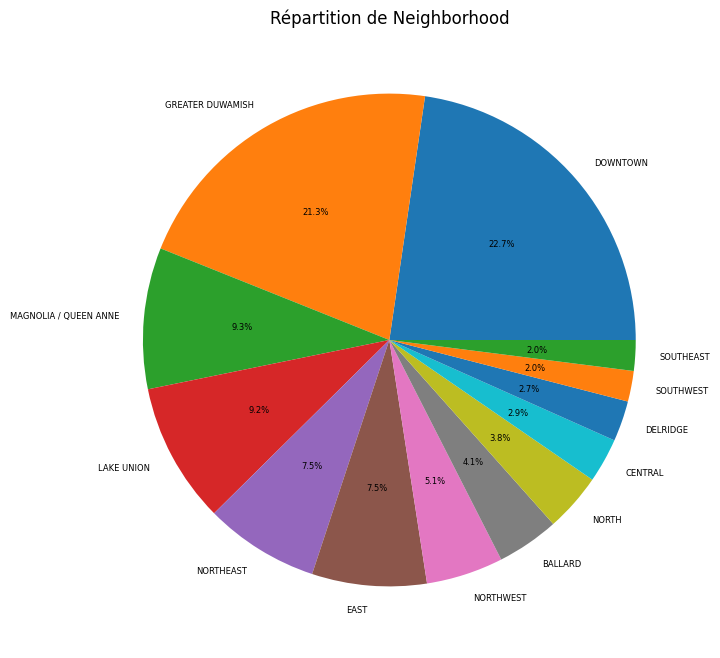

In [124]:
data_cleaned = df['Neighborhood'].dropna()

property_counts = data_cleaned.value_counts()

labels = property_counts.index
sizes = property_counts.values

plt.figure(figsize=(8, 8))

plt.pie(sizes, labels=labels, autopct='%1.1f%%', textprops={'fontsize': 6})

plt.title('Répartition de Neighborhood')

plt.show()

<a id='quartiers-boxplots'></a>
#### Boxplots de la consommation d'énergie en fonction des différents quartiers

<Figure size 1000x600 with 0 Axes>

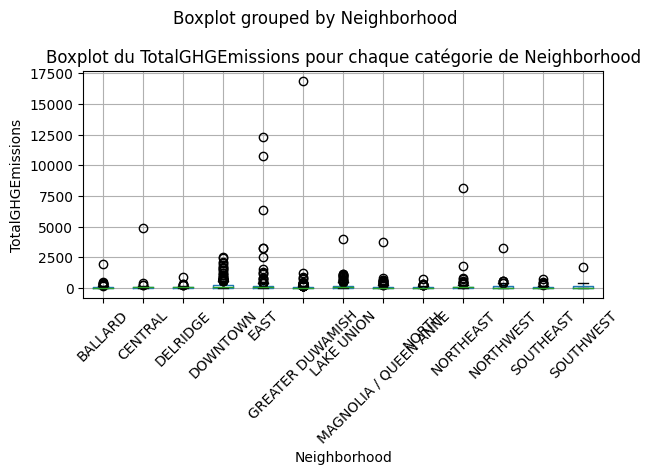

In [125]:
plt.figure(figsize=(10, 6))
df.boxplot(column='TotalGHGEmissions', by='Neighborhood', rot=45)
plt.ylabel('TotalGHGEmissions')
plt.xlabel('Neighborhood')
plt.title('Boxplot du TotalGHGEmissions pour chaque catégorie de Neighborhood')
plt.tight_layout()
plt.show()

#### Feature engineering: distance par rapport au centre ville

Feature engineering à partir de la longitude et de la latitude et de la formule de Harversine.  
Longitude du centre ville de Seattle: -122.3321  
Latitude du centre ville de Seattle: 47.6062  

In [126]:
import math

def haversine_distance(lat1, lng1, lat2, lng2):
   
    lat1_rad = math.radians(lat1)
    lng1_rad = math.radians(lng1)
    lat2_rad = math.radians(lat2)
    lng2_rad = math.radians(lng2)

    radius_earth = 6371.0

    delta_lat = lat2_rad - lat1_rad
    delta_lng = lng2_rad - lng1_rad

    a = math.sin(delta_lat / 2) ** 2 + math.cos(lat1_rad) * math.cos(lat2_rad) * math.sin(delta_lng / 2) ** 2
    c = 2 * math.atan2(math.sqrt(a), math.sqrt(1 - a))
    distance = radius_earth * c

    return distance


In [127]:
seattle_lat = 47.6062
seattle_lon = -122.3321

df['DowntownDistance'] = [haversine_distance(seattle_lat, seattle_lon, x, y) 
                           for x, y in zip(df['Latitude'].astype(float), df['Longitude'].astype(float))]

In [128]:
df.drop(['Latitude', 'Longitude'], axis=1, inplace=True)

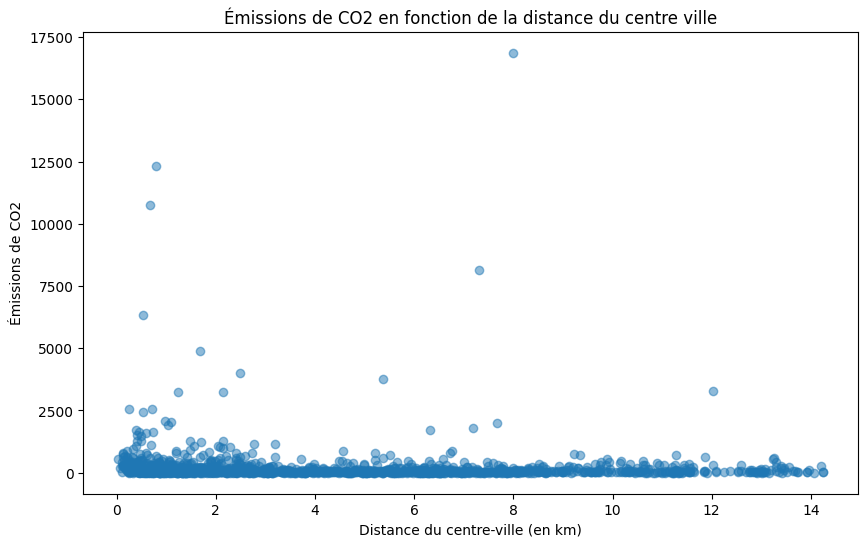

In [129]:
plt.figure(figsize=(10, 6))
plt.scatter(df['DowntownDistance'], df['TotalGHGEmissions'], alpha=0.5)

plt.xlabel('Distance du centre-ville (en km)')
plt.ylabel('Émissions de CO2')
plt.title('Émissions de CO2 en fonction de la distance du centre ville')

plt.show()

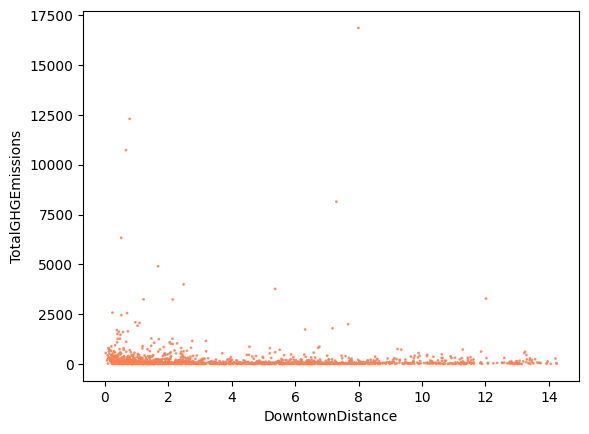

In [130]:
sizes = {}  # clé : coordonnées ; valeur : nombre de points à ces coordonnées
for (yt, yp) in zip(list(df['DowntownDistance']), list(df['TotalGHGEmissions'])):
    if (yt, yp) in sizes:
        sizes[(yt, yp)] += 1
    else:
        sizes[(yt, yp)] = 1

keys = sizes.keys()
plt.scatter(
        [k[0] for k in keys], 
        [k[1] for k in keys], 
        s=[sizes[k] for k in keys], # taille du marqueur
        color='coral', alpha =0.8)


plt.xlabel('DowntownDistance')
plt.ylabel('TotalGHGEmissions')

plt.show()

<a id='export'></a>
### Exportation des données nettoyées en vue de la modélisation

In [132]:
df.shape

(1543, 22)

In [133]:
df.columns

Index(['OSEBuildingID', 'DataYear', 'BuildingType', 'PrimaryPropertyType',
       'PropertyName', 'Address', 'City', 'State', 'ZipCode',
       'TaxParcelIdentificationNumber', 'CouncilDistrictCode', 'Neighborhood',
       'NumberofBuildings', 'NumberofFloors', 'PropertyGFATotal',
       'YearsENERGYSTARCertified', 'ENERGYSTARScore', 'SiteEnergyUse(kBtu)',
       'TotalGHGEmissions', 'BuildingAge', 'GFAParkingPercent',
       'DowntownDistance'],
      dtype='object')

In [134]:
df.to_csv('cleaning_exploration_seattle.csv')

In [135]:
import pandas as pd
df = pd.read_csv("cleaning_exploration_seattle.csv")
df.shape

(1543, 23)

In [136]:
df.columns

Index(['Unnamed: 0', 'OSEBuildingID', 'DataYear', 'BuildingType',
       'PrimaryPropertyType', 'PropertyName', 'Address', 'City', 'State',
       'ZipCode', 'TaxParcelIdentificationNumber', 'CouncilDistrictCode',
       'Neighborhood', 'NumberofBuildings', 'NumberofFloors',
       'PropertyGFATotal', 'YearsENERGYSTARCertified', 'ENERGYSTARScore',
       'SiteEnergyUse(kBtu)', 'TotalGHGEmissions', 'BuildingAge',
       'GFAParkingPercent', 'DowntownDistance'],
      dtype='object')